# import what we need first

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

# Data Preprocessing

### 🔹 Load and preview the data

In [ ]:
import pandas as pd

df = pd.read_csv("/kaggle/input/carpriceprediction/data.csv")
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [57]:
df.shape

(11914, 16)

### 🔹 Handle Missing Values

In [58]:
df.isnull().sum()


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [59]:
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0])

df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].mean())

df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].median())

df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].mode()[0])

df['Market Category'] = df['Market Category'].fillna('Unknown')


In [60]:

df = df[df['MSRP'] > 1000]

### 🔹 Encoding

In [61]:
categorical_cols = [ 'Make', 'Transmission Type', 'Driven_Wheels', 
                    'Vehicle Size', 'Vehicle Style', 'Engine Fuel Type','Market Category']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [62]:
df = df.drop('Model', axis=1)

### 🔹 Train-test split

In [63]:
X = df.drop('MSRP', axis=1)
y = df['MSRP']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
X.shape

(11914, 158)

#  Exploratory Data Analysis (EDA)

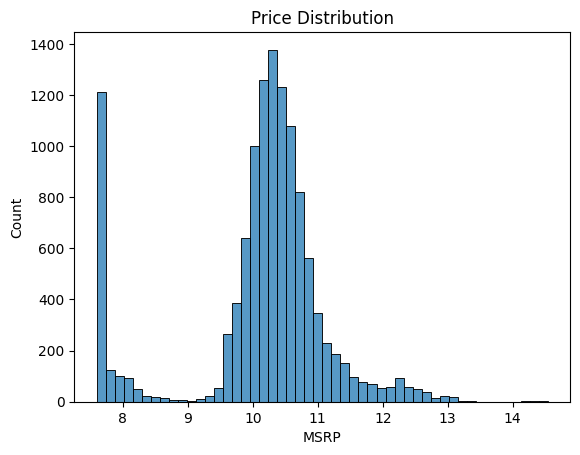

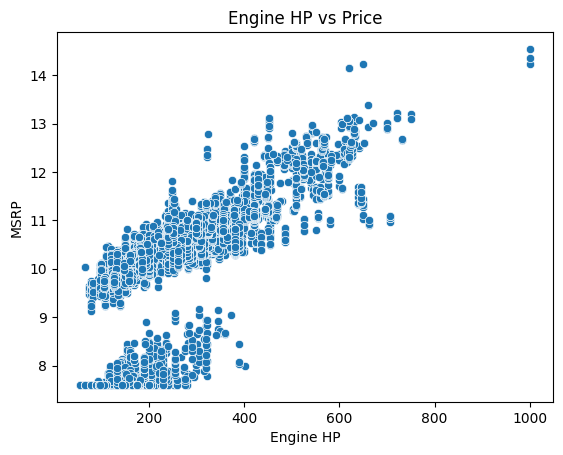

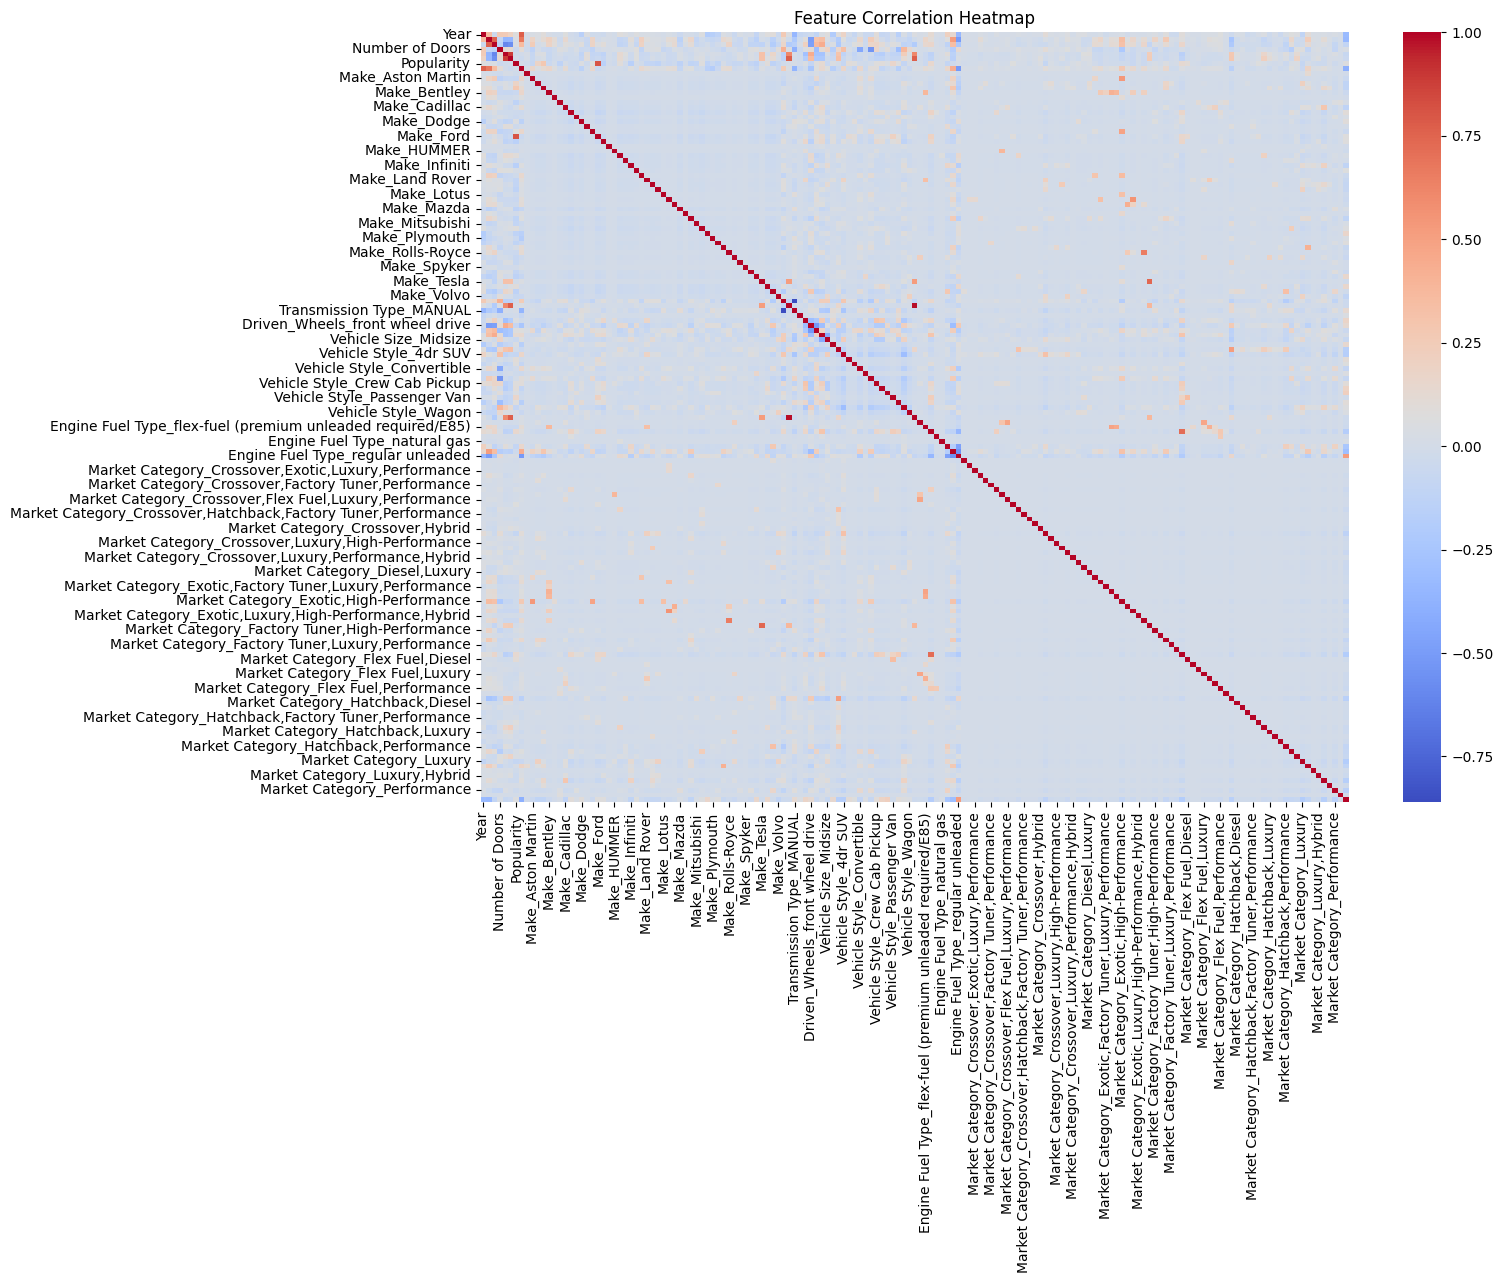

In [65]:
df["MSRP"] = np.log(df["MSRP"])

sns.histplot(df['MSRP'], bins=50)
plt.title("Price Distribution")
plt.show()


sns.scatterplot(x='Engine HP', y='MSRP', data=df)
plt.title("Engine HP vs Price")
plt.show()

plt.figure(figsize=(14, 10))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


 # Feature Engineering

In [66]:

df['Car Age'] = 2025 - df['Year']  # assume this year  مثلا

# Binning لـ Engine HP
df['HP_bin'] = pd.cut(df['Engine HP'], bins=[0, 100, 200, 400, 800], labels=['low', 'medium', 'high', 'very high'])

# One-hot encode لـ HP_bin
df = pd.get_dummies(df, columns=['HP_bin'], drop_first=True)


###  Normalization

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modeling

## 1 . linear regression

* ####   Building the model

In [68]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

* #### Evaluate

In [69]:
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred))
mae_1 = mean_absolute_error(y_test, y_pred)
r2_1 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse_1}")
print(f"MAE: {mae_1}")
print(f"R² Score: {r2_1}")

RMSE: 18073.890885232304
MAE: 8655.589973242573
R² Score: 0.8629511469544106


## 2 . Ridge Regression 

* ####   Building the model

In [70]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)

* #### Evaluate

In [71]:
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred))
mae_2 = mean_absolute_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse_2}")
print(f"MAE: {mae_2}")
print(f"R² Score: {r2_2}")

RMSE: 18072.647679265876
MAE: 8654.02792580887
R² Score: 0.862970000016335


## 3 . lasso Regression 

* ####   Building the model

In [72]:
lasso = Lasso(alpha=1.0, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)

* #### Evaluate

In [73]:
rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred))
mae_3 = mean_absolute_error(y_test, y_pred)
r2_3 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse_3}")
print(f"MAE: {mae_3}")
print(f"R² Score: {r2_3}")

RMSE: 18071.173908031895
MAE: 8651.656966723807
R² Score: 0.8629923478915884


## 4 . Random Forest Regressor

* ####   Building the model

In [74]:
dt = DecisionTreeRegressor(
    max_depth=100,
    min_samples_leaf=10,
    random_state=42
)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

* #### Evaluate

In [75]:
rmse_4 = np.sqrt(mean_squared_error(y_test, y_pred))
mae_4 = mean_absolute_error(y_test, y_pred)
r2_4 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse_4}")
print(f"MAE: {mae_4}")
print(f"R² Score: {r2_4}")

RMSE: 16089.349453278606
MAE: 4848.219889602689
R² Score: 0.891395189507447


## 5 . XGBoost Regressor

* ####   Building the model

In [76]:
xgb = XGBRegressor(
    max_depth=5,
    subsample=0.8,
    random_state=42,
    early_stopping_rounds=50
)


xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=False)

y_pred = xgb.predict(X_test)

* #### Evaluate

In [77]:
rmse_5 = np.sqrt(mean_squared_error(y_test, y_pred))
mae_5 = mean_absolute_error(y_test, y_pred)
r2_5 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse_5}")
print(f"MAE: {mae_5}")
print(f"R² Score: {r2_5}")

RMSE: 9705.576953484013
MAE: 4255.98974609375
R² Score: 0.9604802131652832


# Model selection

In [78]:
pd.DataFrame(
    {'Models':['linear','Ridge','lasso','Random Forest','XGBoost'],
    'R2_score':[r2_1,r2_2,r2_3,r2_4,r2_5]})

,Models,R2_score
0,linear,0.862951
1,Ridge,0.862970
2,lasso,0.862992
3,Random Forest,0.891395
4,XGBoost,0.960480


Clearly **XGBoost Regressor** is the best model to handle this problem

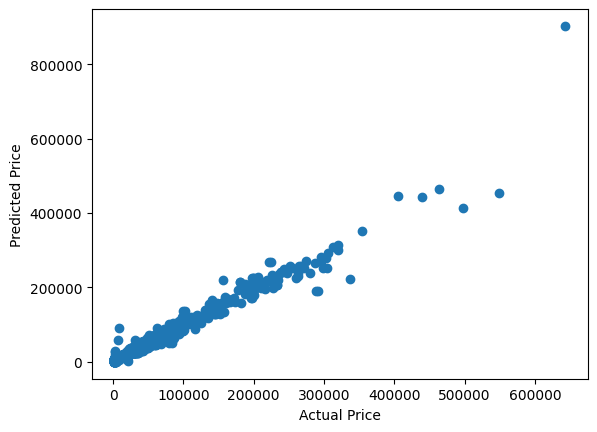

In [79]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

# Feature importance analysis 

In [80]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importance)

                                               Feature  Importance
2                                     Engine Cylinders    0.498440
28                                    Make_Lamborghini    0.063013
1                                            Engine HP    0.054575
6                                           Popularity    0.028707
122     Market Category_Factory Tuner,High-Performance    0.023971
..                                                 ...         ...
45                                           Make_Saab    0.000000
123               Market Category_Factory Tuner,Luxury    0.000000
41                                       Make_Plymouth    0.000000
94          Market Category_Crossover,Flex Fuel,Luxury    0.000000
79   Engine Fuel Type_flex-fuel (premium unleaded r...    0.000000

[158 rows x 2 columns]


This analysis shows that:
1. Engine is the most influential feature on the price of the car.
2. Lamborghini brand increases the price of the car, regardless of its features.

## Deployment


In [82]:
import pickle
# Save the best model (XGBoost)
pickle.dump(xgb, open('model.pkl', 'wb'))
model_columns = X.columns.tolist()
with open('model_columns.pkl', 'wb') as f:
    pickle.dump(model_columns, f)